In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Colabs

Machine Learning Crash Course uses Colaboratories (Colabs) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). For more information about Colabs and how to use them, go to [Welcome to Colaboratory](https://research.google.com/colaboratory).

# Linear Regression
In this Colab you will use a real dataset to train a model to predict the fare of a taxi ride in Chicago, Illinois.

## Learning Objectives
After completing this Colab, you'll be able to:

  * Read a .csv file into a [pandas](https://developers.google.com/machine-learning/glossary/#pandas) DataFrame.
  * Explore a [dataset](https://developers.google.com/machine-learning/glossary/#data_set) with Python visualization libraries.
  * Experiment with different [features](https://developers.google.com/machine-learning/glossary/#feature) to build a linear regression model.
  * Tune the model's [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter).
  * Compare training runs using [root mean squared error](https://developers.google.com/machine-learning/glossary/#root-mean-squared-error-rmse) and [loss curves](https://developers.google.com/machine-learning/glossary/#loss-curve).

## Dataset Description
The [dataset for this exercise](https://storage.mtls.cloud.google.com/mlcc-nextgen-internal/chicago_taxi_train.csv) is derived from the [City of Chicago Taxi Trips dataset](https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew). The data for this exercise is a subset of the Taxi Trips data, and focuses on a two-day period in May of 2022.

# Part 1 - Setup Exercise


---



## Load required modules

This exercise depends on several Python libraries to help with data manipulation, machine learning tasks, and data visualization.

**Instructions**
1. Run the **Load dependencies** code cell (below).

In [2]:
# uncomment the line below to install the necessary packages
#!pip install -r requirements.txt


In [3]:
# Importing general-purpose libraries
import io  # Provides the base classes for streams and handles file-like objects in memory

# Importing libraries for data manipulation and analysis
import numpy as np  # Numpy is used for numerical operations and handling arrays
import pandas as pd  # Pandas is used for working with data in tabular form (like spreadsheets)

# Importing libraries for machine learning
import keras  # Keras is a high-level neural networks API for building and training deep learning models

# Importing libraries for data visualization
import matplotlib.pyplot as plt 
import plotly.express as px  # Plotly Express is a high-level interface for creating interactive visualizations
from plotly.subplots import make_subplots  # Used for creating complex layouts with multiple subplots
import plotly.graph_objects as go  # Provides a low-level interface for creating detailed and customizable plots
import seaborn as sns  # Seaborn is a statistical data visualization library built on top of Matplotlib


## Load the dataset


The following code cell loads the dataset and creates a pandas DataFrame.

You can think of a DataFrame like a spreadsheet with rows and columns. The rows represent individual data examples, and the columns represent the attributes associated with each example.

In [4]:
# Load the Chicago Taxi dataset from a URL
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

# Explanation for Beginners:
# - The above line fetches a CSV file (Comma-Separated Values format) from the provided URL.
# - The CSV file is read into a pandas DataFrame called `chicago_taxi_dataset`.
# - A pandas DataFrame is a table-like structure in Python that is widely used for data analysis.

# To check that the dataset has been loaded correctly:
print("First five rows of the dataset:")
print(chicago_taxi_dataset.head())  # This displays the first 5 rows of the dataset to inspect the structure and data.


First five rows of the dataset:
    TRIP_START_TIMESTAMP     TRIP_END_TIMESTAMP  TRIP_START_HOUR  \
0  05/17/2022 7:15:00 AM  05/17/2022 7:45:00 AM             7.25   
1  05/17/2022 5:15:00 PM  05/17/2022 5:30:00 PM            17.25   
2  05/17/2022 5:15:00 PM  05/17/2022 5:30:00 PM            17.25   
3  05/17/2022 6:00:00 PM  05/17/2022 7:00:00 PM            18.00   
4  05/17/2022 5:00:00 PM  05/17/2022 5:30:00 PM            17.00   

   TRIP_SECONDS  TRIP_MILES  TRIP_SPEED  PICKUP_CENSUS_TRACT  \
0          2341        2.57         4.0                  NaN   
1          1074        1.18         4.0                  NaN   
2          1173        1.29         4.0         1.703132e+10   
3          3360        3.70         4.0         1.703132e+10   
4          1044        1.15         4.0         1.703132e+10   

   DROPOFF_CENSUS_TRACT  PICKUP_COMMUNITY_AREA  DROPOFF_COMMUNITY_AREA   FARE  \
0                   NaN                    NaN                    17.0  31.99   
1          1

## Update the dataframe

The following code cell updates the DataFrame to use only specific columns from the dataset.

Notice that that output shows just a sample of the dataset, but there should be enough information for you to identify the features associated with the dataset, and have a look at the actual data for a few examples.

In [5]:
# Update the DataFrame to include only specific columns
# - Here, we are selecting a subset of the columns from the original dataset
# - These columns are chosen because they are likely relevant for the analysis or modeling process
training_df = chicago_taxi_dataset[['TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE']]

# Print a confirmation message to indicate the dataset has been processed
print('Read dataset completed successfully.')

# Display the total number of rows in the filtered DataFrame
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))

# Preview the first 200 rows of the filtered dataset
# - This helps us inspect the data and verify that the selection was performed correctly
training_df.head(200)


Read dataset completed successfully.
Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


# Part 2 - Dataset Exploration


---



## View dataset statistics

A large part of most machine learning projects is getting to know your data. In this step, you will use the ``DataFrame.describe`` method to view descriptive statistics about the dataset and answer some important questions about the data.

**Instructions**
1. Run the **View dataset statistics** code cell.
1. Inspect the output and answer these questions:
  * What is the maximum fare?
  * What is the mean distance across all trips?
  * How many cab companies are in the dataset?
  * What is the most frequent payment type?
  * Are any features missing data?
1. Run the code **View answers to dataset statistics** code cell to check your answers.


You might be wondering why there are groups of `NaN` (not a number) values listed in the output. When working with data in Python, you may see this value if the result of a calculation can not be computed or if there is missing information. For example, in the taxi dataset `PAYMENT_TYPE` and `COMPANY` are non-numeric, categorical features; numeric information such as mean and max do not make sense for categorical features so the output displays `NaN`.

In [6]:
# Display the total number of rows in the DataFrame
# - This confirms how many data points (rows) are in the dataset
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))

# View dataset statistics
# - `describe()` generates descriptive statistics for the DataFrame.
# - It provides insights into numerical columns (like mean, min, max, standard deviation) by default.
# - Using `include='all'` extends the summary to non-numerical columns, providing details like unique counts and the most frequent value.
dataset_statistics = training_df.describe(include='all')

# Display the statistics to inspect data distributions and summaries
print("Dataset Statistics:\n")
print(dataset_statistics)


Total number of rows: 31694


Dataset Statistics:

          TRIP_MILES  TRIP_SECONDS          FARE    COMPANY PAYMENT_TYPE  \
count   31694.000000  31694.000000  31694.000000      31694        31694   
unique           NaN           NaN           NaN         31            7   
top              NaN           NaN           NaN  Flash Cab  Credit Card   
freq             NaN           NaN           NaN       7887        14142   
mean        8.289463   1319.796397     23.905210        NaN          NaN   
std         7.265672    928.932873     16.970022        NaN          NaN   
min         0.500000     60.000000      3.250000        NaN          NaN   
25%         1.720000    548.000000      9.000000        NaN          NaN   
50%         5.920000   1081.000000     18.750000        NaN          NaN   
75%        14.500000   1888.000000     38.750000        NaN          NaN   
max        68.120000   7140.000000    159.250000        NaN          NaN   

            TIP_RATE  
count   31694

In [7]:
# Answers to dataset statistics questions
# These answers are derived by inspecting the data and using pandas methods to calculate them.

# What is the maximum fare?
# - The .max() method finds the highest value in the 'FARE' column.
max_fare = training_df['FARE'].max()
print("What is the maximum fare? \t\t\t\tAnswer: ${fare:.2f}".format(fare=max_fare))

# What is the mean distance across all trips?
# - The .mean() method calculates the average value in the 'TRIP_MILES' column.
mean_distance = training_df['TRIP_MILES'].mean()
print("What is the mean distance across all trips? \t\tAnswer: {mean:.4f} miles".format(mean=mean_distance))

# How many cab companies are in the dataset?
# - The .nunique() method returns the number of unique values in the 'COMPANY' column.
num_unique_companies = training_df['COMPANY'].nunique()
print("How many cab companies are in the dataset? \t\tAnswer: {number}".format(number=num_unique_companies))

# What is the most frequent payment type?
# - The .value_counts() method counts occurrences of each value in 'PAYMENT_TYPE'.
# - The .idxmax() method returns the index (payment type) of the most frequent value.
most_freq_payment_type = training_df['PAYMENT_TYPE'].value_counts().idxmax()
print("What is the most frequent payment type? \t\tAnswer: {type}".format(type=most_freq_payment_type))

# Are any features missing data?
# - The .isnull() method checks for missing (NaN) values.
# - .sum().sum() calculates the total number of missing values in the entire DataFrame.
missing_values = training_df.isnull().sum().sum()
print("Are any features missing data? \t\t\t\tAnswer:", "No" if missing_values == 0 else "Yes")

# For reference, the expected answers were:
# Maximum fare: $159.25
# Mean distance: ~8.2895 miles
# Number of cab companies: 31
# Most frequent payment type: Credit Card
# Missing features: No


What is the maximum fare? 				Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		Answer: 31
What is the most frequent payment type? 		Answer: Credit Card
Are any features missing data? 				Answer: No


## Generate a correlation matrix

An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label). If you have ever taken a taxi ride before, your experience is probably telling you that the fare is typically associated with the distance traveled and the duration of the trip. But, is there a way for you to learn more about how well these features correlate to the fare (label)?

In this step, you will use a **correlation matrix** to identify features whose values correlate well with the label. Correlation values have the following meanings:

  * **`1.0`**: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
  * **`-1.0`**: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
  * **`0.0`**: no correlation; the two columns [are not linearly related](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

In general, the higher the absolute value of a correlation value, the greater its predictive power.

**Instructions**

1. Inspect the code in the **View correlation matrix** code cell.
1. Run the **View correlation matrix** code cell and inspect the output.
1. **Check your understanding** by answering these questions:
  * Which feature correlates most strongly to the label FARE?
  * Which feature correlates least strongly to the label FARE?


In [8]:
# View the correlation matrix for numerical columns in the DataFrame
# - The .corr() method calculates the correlation coefficients between numeric columns.
# - Setting numeric_only=True ensures only numerical columns are included in the calculation (avoiding errors with non-numeric data).
correlation_matrix = training_df.corr(numeric_only=True)

# Display the correlation matrix
# - The correlation matrix shows the strength and direction of relationships between variables.
# - Values range from -1 to 1:
#     - 1 means a perfect positive correlation (variables increase together).
#     - -1 means a perfect negative correlation (one variable increases as the other decreases).
#     - 0 means no correlation.
print("Correlation Matrix:\n")
print(correlation_matrix)


Correlation Matrix:

              TRIP_MILES  TRIP_SECONDS      FARE  TIP_RATE
TRIP_MILES      1.000000      0.800855  0.975344 -0.049594
TRIP_SECONDS    0.800855      1.000000  0.830292 -0.084294
FARE            0.975344      0.830292  1.000000 -0.070979
TIP_RATE       -0.049594     -0.084294 -0.070979  1.000000


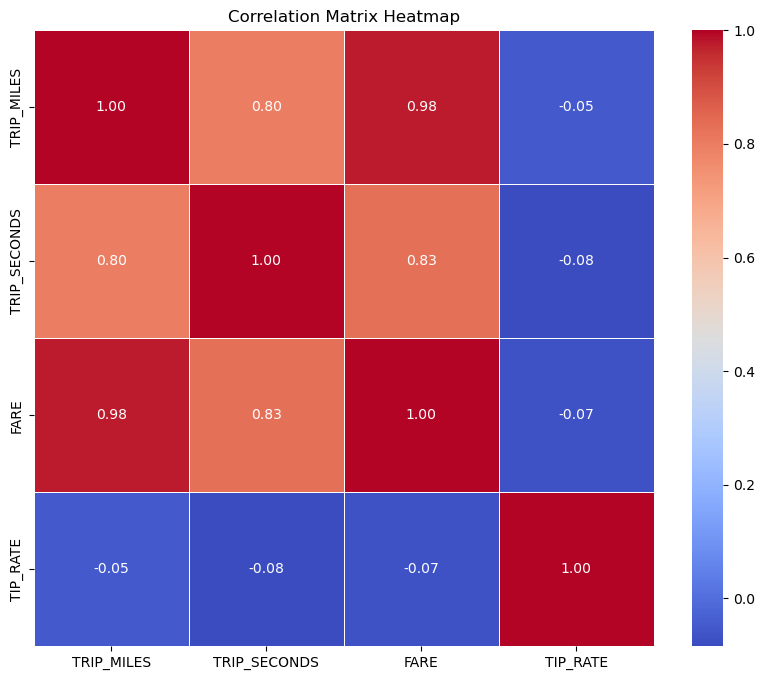

In [9]:
# BONUS: Visualizing the Correlation Matrix as a Heatmap
# Calculate the correlation matrix for numeric columns
correlation_matrix = training_df.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title to the heatmap
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()


In [10]:
# Explanation of answers regarding the correlation matrix
# -------------------------------------------------------

# Which feature correlates most strongly to the label FARE?
# ---------------------------------------------------------
# - Use the correlation matrix to find the correlation values for 'FARE' with other features.
# - Sort the correlations to identify the strongest one (excluding 'FARE' itself).
correlation_with_fare = correlation_matrix['FARE'].drop('FARE')
strongest_correlation_feature = correlation_with_fare.idxmax()  # Feature with the highest correlation
strongest_correlation_value = correlation_with_fare.max()

print(f"The feature with the strongest correlation to the FARE is {strongest_correlation_feature} "
        f"with a correlation value of {strongest_correlation_value:.2f}.")
print("As expected, TRIP_MILES looks like a good feature to train the model, and TRIP_SECONDS also shows a strong correlation.")

# Which feature correlates least strongly to the label FARE?
# -----------------------------------------------------------
# - The weakest correlation (closest to 0) indicates the least related feature.
weakest_correlation_feature = correlation_with_fare.idxmin()  # Feature with the lowest correlation
weakest_correlation_value = correlation_with_fare.min()

print(f"The feature with the weakest correlation to the FARE is {weakest_correlation_feature} "
        f"with a correlation value of {weakest_correlation_value:.2f}.")
print("This suggests that TIP_RATE has the weakest relationship to the FARE.")

# Insights from Correlation Analysis
# -----------------------------------
# These findings can guide feature selection for modeling, with the most correlated features 
# being prioritized for training and the least correlated features possibly excluded.


The feature with the strongest correlation to the FARE is TRIP_MILES with a correlation value of 0.98.
As expected, TRIP_MILES looks like a good feature to train the model, and TRIP_SECONDS also shows a strong correlation.
The feature with the weakest correlation to the FARE is TIP_RATE with a correlation value of -0.07.
This suggests that TIP_RATE has the weakest relationship to the FARE.


## Visualize relationships in dataset

Sometimes it is helpful to visualize relationships between features in a dataset; one way to do this is with a pair plot. A **pair plot** generates a grid of pairwise plots to visualize the relationship of each feature with all other features all in one place.

**Instructions**
1. Run the **View pair plot** code cell.

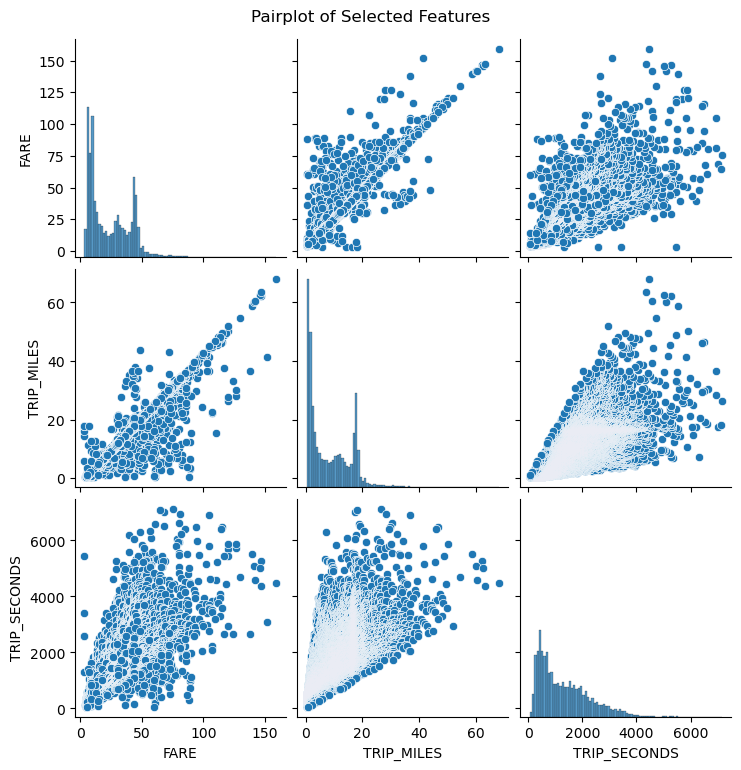

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt  # Ensure matplotlib is available for plotting

# Create a pairplot for visualizing relationships between selected features
# - Pairplot generates scatterplots for each pair of specified columns, allowing us to visually inspect correlations.
# - x_vars specifies the columns for the x-axes, while y_vars specifies the columns for the y-axes.
sns.pairplot(training_df, 
                x_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"], 
                y_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

# Show the plot
plt.suptitle("Pairplot of Selected Features", y=1.02)  # Add a title with proper positioning
plt.show()


# Part 3 - Train Model


---



## Define functions to view model information

To help visualize the results of each training run you will generate two plots at the end of each experiment:

* a scatter plot of the features vs. the label with a line showing the output of the trained model
* a loss curve

For this exercise, the plotting functions are provided for you. Unless you are interested, it is not important for you to understand how these plotting functions work.

**Instructions**
1. Run the **Define plotting functions** code cell.

In [12]:
# Main function to generate visualizations
def make_plots(df, feature_names, label_name, model_output, sample_size=200):
    """
    Creates and displays plots to visualize the data, model predictions, and training process.

    Parameters:
        df (pd.DataFrame): The dataset containing features and labels.
        feature_names (list): List of column names for features (independent variables).
        label_name (str): The name of the target variable (dependent variable).
        model_output (tuple): Contains weights, bias, epochs, and RMSE values for the trained model.
        sample_size (int): Number of random samples to include in the plots (default is 200).
    """
    # Step 1: Randomly sample data for plotting
    # Sampling makes the plot faster to render while still showing a representative portion of the data
    random_sample = df.sample(n=sample_size).copy()  # Randomly select 'sample_size' rows from the DataFrame
    random_sample.reset_index(drop=True, inplace=True)  # Reset the index for the sampled data to ensure clean plots

    # Step 2: Extract the model's parameters from the output
    weights, bias, epochs, rmse = model_output

    # Step 3: Determine the type of plot needed
    # - If there's only one feature, use a 2D scatter plot.
    # - If there are two features, use a 3D surface plot.
    is_2d_plot = len(feature_names) == 1  # Check if we're dealing with 1D or 2D data
    model_plot_type = "scatter" if is_2d_plot else "surface"  # Use scatter for 1D, surface for 2D

    # Step 4: Create a subplot structure with two areas:
    # - The first plot will show the loss curve (training progress over epochs).
    # - The second plot will visualize the model's predictions compared to the data.
    fig = make_subplots(
        rows=1, cols=2,  # We want 1 row and 2 columns for the subplots
        subplot_titles=("Loss Curve", "Model Plot"),  # Titles for each subplot
        specs=[[{"type": "scatter"}, {"type": model_plot_type}]]  # Specify plot types for each subplot
    )

    # Step 5: Add plots to the subplot
    plot_data(random_sample, feature_names, label_name, fig)  # Visualize the original data
    plot_model(random_sample, feature_names, weights, bias, fig)  # Visualize the model's predictions
    plot_loss_curve(epochs, rmse, fig)  # Add the training loss curve

    # Step 6: Display the completed figure with all subplots
    fig.show()


# Function to plot the loss curve (model training progress)
def plot_loss_curve(epochs, rmse, fig):
    """
    Plots the loss curve, showing how the error (RMSE) changes over epochs during training.

    Parameters:
        epochs (list): List of epoch numbers (iterations during training).
        rmse (list): List of Root Mean Squared Error (RMSE) values for each epoch.
        fig (plotly.graph_objs._figure.Figure): The subplot figure to which the curve will be added.
    """
    # Create a line plot showing RMSE vs. Epochs
    curve = px.line(x=epochs, y=rmse, labels={'x': 'Epoch', 'y': 'RMSE'})  # x-axis: epochs, y-axis: RMSE

    # Customize the line's appearance for better visibility
    curve.update_traces(line_color='#ff0000', line_width=3)  # Red color and thicker line

    # Add the loss curve to the first subplot (row 1, column 1)
    fig.add_trace(curve.data[0], row=1, col=1)

    # Update axis titles and scale for the loss curve
    fig.update_xaxes(title_text="Epoch", row=1, col=1)  # Label the x-axis
    fig.update_yaxes(
        title_text="Root Mean Squared Error", row=1, col=1,  # Label the y-axis
        range=[min(rmse) * 0.8, max(rmse)]  # Adjust the range to give some padding for better visualization
    )


# Function to plot the original data points
def plot_data(df, features, label, fig):
    """
    Visualizes the original data points in either 2D (scatter) or 3D (scatter_3d) plots.

    Parameters:
        df (pd.DataFrame): The data to plot.
        features (list): The feature columns to plot on the x-axis (and y-axis for 3D).
        label (str): The target variable (to be plotted on the y-axis in 2D or z-axis in 3D).
        fig (plotly.graph_objs._figure.Figure): The subplot figure to which the data plot will be added.
    """
    # Check if we're plotting in 2D or 3D
    if len(features) == 1:
        # Create a 2D scatter plot
        scatter = px.scatter(df, x=features[0], y=label)
    else:
        # Create a 3D scatter plot
        scatter = px.scatter_3d(df, x=features[0], y=features[1], z=label)

    # Add the data points to the second subplot (row 1, column 2)
    fig.add_trace(scatter.data[0], row=1, col=2)

    # Update axis labels for 2D or 3D plots
    if len(features) == 1:
        fig.update_xaxes(title_text=features[0], row=1, col=2)  # Label x-axis
        fig.update_yaxes(title_text=label, row=1, col=2)  # Label y-axis
    else:
        # Update labels for 3D plot
        fig.update_layout(scene=dict(
            xaxis_title=features[0],  # Label x-axis
            yaxis_title=features[1],  # Label y-axis
            zaxis_title=label  # Label z-axis
        ))


# Function to plot the model's predictions
def plot_model(df, features, weights, bias, fig):
    """
    Overlays the model's predictions onto the original data.

    Parameters:
        df (pd.DataFrame): The dataset, including features and predictions.
        features (list): The feature columns used for prediction.
        weights (list): The model's weights for each feature.
        bias (list): The model's bias term.
        fig (plotly.graph_objs._figure.Figure): The subplot figure to which the model plot will be added.
    """
    # Step 1: Compute the predicted values for the target variable
    df['FARE_PREDICTED'] = bias[0]  # Start with the bias term
    for index, feature in enumerate(features):
        # Add the contribution of each feature to the predicted value
        df['FARE_PREDICTED'] += weights[index][0] * df[feature]

    # Step 2: Create a line (2D) or surface (3D) plot for the model's predictions
    if len(features) == 1:
        # Create a 2D line plot for the predictions
        model = px.line(df, x=features[0], y='FARE_PREDICTED')
        model.update_traces(line_color='#ff0000', line_width=3)  # Customize appearance
    else:
        # Create a 3D surface plot for predictions (useful for 2D input features)
        x = df[features[0]]
        y = df[features[1]]
        z = df['FARE_PREDICTED']
        model = go.Figure(data=go.Surface(z=[z], x=x, y=y))

    # Add the model plot to the second subplot (row 1, column 2)
    fig.add_trace(model.data[0], row=1, col=2)


# Function to display model details
def model_info(feature_names, label_name, model_output):
    """
    Prints the model equation, weights, and bias in a readable format.

    Parameters:
        feature_names (list): List of feature column names.
        label_name (str): The target variable name.
        model_output (tuple): Contains the model weights and bias.
    """
    weights = model_output[0]  # Extract weights
    bias = model_output[1]  # Extract bias

    # Prepare a formatted string with model details
    nl = "\n"  # Newline character for readability
    header = "-" * 80  # Decorative separator
    banner = header + nl + "|" + "MODEL INFO".center(78) + "|" + nl + header  # Title banner

    info = ""  # Initialize an empty string to hold the model info
    equation = f"{label_name} = "  # Start the equation with the target variable

    # Loop through features to add their weights to the equation
    for index, feature in enumerate(feature_names):
        info += f"Weight for feature [{feature}]: {weights[index][0]:.3f}\n"  # Add weight details
        equation += f"{weights[index][0]:.3f} * {feature} + "  # Add feature contribution to the equation

    # Add the bias term to the info and equation
    info += f"Bias: {bias[0]:.3f}\n"
    equation += f"{bias[0]:.3f}\n"

    # Return the complete formatted string
    return banner + nl + info + nl + equation


# Confirmation message
print("SUCCESS: Defining plotting functions complete.")


SUCCESS: Defining plotting functions complete.


## Define functions to build and train a model

The code you need to build and train your model is in the **Define ML functions** code cell. If you would like to explore this code, expand the code cell and take a look.

**Instructions**
1. Run the **Define ML functions** code cell.

In [13]:
# Function to create and compile a simple linear regression model
def build_model(my_learning_rate, num_features):
    """
    Creates and compiles a simple linear regression model.

    Parameters:
        my_learning_rate (float): The learning rate for the optimizer.
        num_features (int): The number of features (input variables) for the model.

    Returns:
        keras.Model: A compiled Keras model ready for training.
    """
    # Define the input layer, which expects 'num_features' inputs
    inputs = keras.Input(shape=(num_features,))

    # Define the output layer, which predicts a single numeric value
    outputs = keras.layers.Dense(units=1)(inputs)

    # Combine the input and output layers into a model
    model = keras.Model(inputs=inputs, outputs=outputs)

    # Compile the model:
    # - Optimizer: RMSprop with the specified learning rate (adjusts weights during training).
    # - Loss: Mean Squared Error (measures prediction accuracy).
    # - Metric: Root Mean Squared Error (monitors training performance).
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=my_learning_rate),
        loss="mean_squared_error",
        metrics=[keras.metrics.RootMeanSquaredError()]
    )

    return model


# Function to train the model on a dataset
def train_model(model, df, features, label, epochs, batch_size):
    """
    Trains the model by feeding it features and labels.

    Parameters:
        model (keras.Model): The compiled Keras model.
        df (pd.DataFrame): The dataset (not directly used here but passed for reference).
        features (np.ndarray): The input features for training.
        label (np.ndarray): The target values for training.
        epochs (int): The number of training iterations.
        batch_size (int): The number of samples per training batch.

    Returns:
        tuple: Contains the trained weights, bias, epochs list, and RMSE per epoch.
    """
    # Train the model using the features and labels
    # - batch_size: Number of samples processed at a time during training.
    # - epochs: Number of full passes through the dataset.
    history = model.fit(
        x=features,  # Input features (independent variables)
        y=label,     # Target values (dependent variable)
        batch_size=batch_size,
        epochs=epochs
    )

    # Retrieve the model's trained weights (parameters) and bias
    trained_weight = model.get_weights()[0]  # Weights for each feature
    trained_bias = model.get_weights()[1]    # Bias term

    # Extract the epoch numbers from the training history
    epochs = history.epoch

    # Convert the training history (loss, metrics) into a DataFrame for analysis
    hist = pd.DataFrame(history.history)

    # Extract the RMSE for each epoch (monitors training progress)
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse


# Function to run a complete training experiment
def run_experiment(df, feature_names, label_name, learning_rate, epochs, batch_size):
    """
    Runs a training experiment by building, training, and evaluating a model.

    Parameters:
        df (pd.DataFrame): The dataset containing features and labels.
        feature_names (list): The names of the features (independent variables).
        label_name (str): The name of the target variable (dependent variable).
        learning_rate (float): The learning rate for the optimizer.
        epochs (int): The number of training iterations.
        batch_size (int): The number of samples per training batch.

    Returns:
        keras.Model: The trained Keras model.
    """
    print('INFO: Starting training experiment with features={} and label={}\n'.format(feature_names, label_name))

    # Step 1: Count the number of features
    num_features = len(feature_names)

    # Step 2: Extract features and labels from the DataFrame
    features = df.loc[:, feature_names].values  # Extract feature columns as a NumPy array
    label = df[label_name].values               # Extract the target column as a NumPy array

    # Step 3: Build a linear regression model with the specified learning rate
    model = build_model(learning_rate, num_features)

    # Step 4: Train the model and capture training metrics (weights, bias, epochs, RMSE)
    model_output = train_model(model, df, features, label, epochs, batch_size)

    print('\nSUCCESS: Training experiment complete\n')

    # Step 5: Display the model's details and weights
    print('{}'.format(model_info(feature_names, label_name, model_output)))

    # Step 6: Visualize the model's performance (loss curve and predictions)
    make_plots(df, feature_names, label_name, model_output)

    return model  # Return the trained model


# Confirmation message to indicate successful definition of the functions
print("SUCCESS: Defining linear regression functions complete.")


SUCCESS: Defining linear regression functions complete.


## Train a model with one feature

In this step you will train a model to predict the cost of the fare using a **single feature**. Earlier, you saw that `TRIP_MILES` (distance) correlates most strongly with the ``FARE``, so let's start with `TRIP_MILES` as the feature for your first training run.

**Instructions**

1. Run the **Experiment 1** code cell to build your model with one feature.
1. Review the output from the training run
1. **Check your understanding** by answering these questions:
  * How many epochs did it take to converge on the final model?
  * How well does the model fit the sample data?

During training, you should see the root mean square error (RMSE) in the output. The units for RMSE are the same as the units for the label (dollars). In other words, you can use the RMSE to determine how far off, on average, the predicted fares are in dollars from the observed values.

In [14]:
# Experiment 1: Train a linear regression model using a single feature

# Step 1: Define the hyperparameters
# - Hyperparameters control the training process.
# - These values can be adjusted to improve the model's performance.
learning_rate = 0.001  # The rate at which the model updates its weights during training
epochs = 20            # The number of complete passes through the dataset
batch_size = 50        # The number of data samples processed together in a single training step

# Step 2: Specify the feature and label
# - Feature: Independent variable used for prediction (input to the model).
# - Label: Dependent variable to be predicted (output from the model).
features = ['TRIP_MILES']  # Using only the 'TRIP_MILES' column as the input feature
label = 'FARE'             # The target variable is 'FARE'

# Step 3: Run the experiment
# - This function builds, trains, and evaluates the model using the specified parameters.
# - It also visualizes the training process and predictions.
model_1 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

# Notes for Beginners:
# - The `run_experiment` function:
#   1. Builds a linear regression model with a single input feature.
#   2. Trains the model on the dataset (using the specified hyperparameters).
#   3. Visualizes the training loss curve and model predictions.
#   4. Returns the trained model for further use or evaluation.


INFO: Starting training experiment with features=['TRIP_MILES'] and label=FARE

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - loss: 1289.4154 - root_mean_squared_error: 35.8901
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 821.9614 - root_mean_squared_error: 28.6501
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 453.9261 - root_mean_squared_error: 21.2844
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 202.7274 - root_mean_squared_error: 14.2073
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 60.8452 - root_mean_squared_error: 7.7521
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 16.4068 - root_mean_squared_error: 4.0438
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 14.4448 - root_mean_squared_error: 3.7888
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 13.6996 - root_mean_squared_error: 3.6986
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 14.3512 - root_me

In [15]:
# Double-click to view answers for training the model with one feature

# Question 1: How many epochs did it take to converge on the final model?
# -----------------------------------------------------------------------
# - "Convergence" means the point during training where the loss stops significantly decreasing.
# - The loss curve shows this visually. Look for when the curve flattens out.
# - With the provided hyperparameters:
#     - learning_rate = 0.001
#     - epochs = 20
#     - batch_size = 50
# - The model converges after approximately 5 epochs.

answer_epochs = """
Use the loss curve to see where the loss begins to level off during training.

With this set of hyperparameters:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

it takes about 5 epochs for the training run to converge to the final model.
"""
print(answer_epochs)

# Question 2: How well does the model fit the sample data?
# -----------------------------------------------------------------------
# - The model plot overlays the predicted values on the actual data points.
# - A good fit is indicated by the line passing closely through the majority of data points.
# - With the given settings, the model appears to fit the sample data fairly well.

answer_fit = '''
It appears from the model plot that the model fits the sample data fairly well.
'''
print(answer_fit)



Use the loss curve to see where the loss begins to level off during training.

With this set of hyperparameters:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

it takes about 5 epochs for the training run to converge to the final model.


It appears from the model plot that the model fits the sample data fairly well.



## Experiment with hyperparameters

It is common with machine learning to run multiple experiments to find the best set of hyperparmeters to train your model. In this step, try varying the hyperparameters one by one with this set of experiments:

* *Experiment 1:* **Increase** the learning rate to **``1``** (batch size at ``50``).
* *Experiment 2:* **Decrease** the learning rate to **``0.0001``** (batch size at ``50``).
* *Experiment 3:* **Increase** the batch size to **``500``** (learning rate at ``0.001``).

**Instructions**
1. Update the hyperparameter values in the **Experiment 2** code cell according to the experiment.
2. Run the **Experiment 2** code cell.
3. After the training run, examine the output and note any differences you see in the loss curve or model output.
4. Repeat steps 1 - 3 for each hyperparameter experiment.
5. **Check your understanding** by answering these questions:
  * How did raising the learning rate impact your ability to train the model?
  * How did lowering the learning rate impact your ability to train the model?
  * Did changing the batch size effect your training results?


In [16]:
# Experiment 2: Train the model using adjusted hyperparameters
# -------------------------------------------------------------

# Step 1: Define the hyperparameters
# - Hyperparameters are tunable parameters that control the training process.
# - Adjusting these values allows us to experiment with the model's performance.

# TODO: Experiment by changing these values to observe their impact on training.
learning_rate = 0.001  # Determines how much the model adjusts weights with each update
epochs = 20            # Number of complete passes through the dataset during training
batch_size = 50        # Number of data samples processed together in one training step

# Step 2: Specify the feature and label
# - The feature is the input variable (independent variable) the model uses for prediction.
# - The label is the output variable (dependent variable) the model tries to predict.
features = ['TRIP_MILES']  # Use 'TRIP_MILES' as the input feature
label = 'FARE'             # Predict 'FARE' as the target variable

# Step 3: Run the experiment
# - The `run_experiment` function:
#   1. Builds and compiles a simple linear regression model.
#   2. Trains the model using the specified hyperparameters and data.
#   3. Visualizes training progress (loss curve) and model predictions (scatter plot).
# - The trained model is returned and stored in `model_1`.
model_1 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

# Notes for Beginners:
# --------------------
# - `learning_rate`: A smaller value leads to slower but more stable training.
#   Larger values can speed up training but might cause instability.
# - `epochs`: Increasing this value allows the model to learn more, but too many epochs
#   can lead to overfitting (the model learns noise instead of patterns).
# - `batch_size`: Smaller batches may improve generalization but slow down training.
# - Experiment with different values to observe their impact on the loss curve and predictions.


INFO: Starting training experiment with features=['TRIP_MILES'] and label=FARE

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - loss: 841.8950 - root_mean_squared_error: 28.9985
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 477.9320 - root_mean_squared_error: 21.8394
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 222.0711 - root_mean_squared_error: 14.8655
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 66.6152 - root_mean_squared_error: 8.1229
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 17.2296 - root_mean_squared_error: 4.1465
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 16.4063 - root_mean_squared_error: 4.0399
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 15.7020 - root_mean_squared_error: 3.9580
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 14.3101 - root_mean_squared_error: 3.7746
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 12.6863 - root_mean_

In [17]:
# Double-click to view answers for hyperparameter experiments

# Question 1: How did raising the learning rate impact your ability to train the model?
# -------------------------------------------------------------------------------------
# - A learning rate that is too high can cause the model's training to become unstable.
# - In the loss curve, this appears as erratic behavior where the loss value fluctuates
#   widely instead of decreasing smoothly.
# - High learning rates prevent the model from converging to an optimal solution,
#   leading to poor predictions and a poor fit to the data.

answer_high_lr = """
When the learning rate is too high, the loss curve bounces around and does not
appear to be moving towards convergence with each iteration. Also, notice that
the predicted model does not fit the data very well. With a learning rate that
is too high, it is unlikely that you will be able to train a model with good
results.
"""
print(answer_high_lr)


# Question 2: How did lowering the learning rate impact your ability to train the model?
# -------------------------------------------------------------------------------------
# - A learning rate that is too low makes the training process very slow.
# - In the loss curve, you will notice a gradual decline in loss without significant drops.
# - Although the model may eventually converge, it requires more epochs to do so,
#   increasing the training time significantly.

answer_low_lr = '''
When the learning rate is too small, it may take longer for the loss curve to
converge. With a small learning rate, the loss curve decreases slowly, but does
not show a dramatic drop or leveling off. With a small learning rate, you could
increase the number of epochs so that your model will eventually converge, but
it will take longer.
'''
print(answer_low_lr)


# Question 3: Did changing the batch size affect your training results?
# -------------------------------------------------------------------------------------
# - Increasing the batch size reduces the time it takes to process one epoch,
#   as more samples are processed together.
# - However, larger batch sizes may lead to slower convergence as they smooth
#   out the gradient updates, requiring more epochs to reach an optimal solution.
# - Smaller batch sizes often lead to better generalization but increase training time.

answer_batch_size = '''
Increasing the batch size makes each epoch run faster, but as with the smaller
learning rate, the model does not converge with just 20 epochs. If you have
time, try increasing the number of epochs and eventually you should see the
model converge.
'''
print(answer_batch_size)



When the learning rate is too high, the loss curve bounces around and does not
appear to be moving towards convergence with each iteration. Also, notice that
the predicted model does not fit the data very well. With a learning rate that
is too high, it is unlikely that you will be able to train a model with good
results.


When the learning rate is too small, it may take longer for the loss curve to
converge. With a small learning rate, the loss curve decreases slowly, but does
not show a dramatic drop or leveling off. With a small learning rate, you could
increase the number of epochs so that your model will eventually converge, but
it will take longer.


Increasing the batch size makes each epoch run faster, but as with the smaller
learning rate, the model does not converge with just 20 epochs. If you have
time, try increasing the number of epochs and eventually you should see the
model converge.



## Train a model with two features

The model you trained with the feature ``TOTAL_MILES`` demonstrates fairly strong predictive power, but is it possible to do better? In this step, try training the model with two features, ``TRIP_MILES`` and ``TRIP_MINUTES``, to see if you can improve the model. You may recall that the original dataset does not include a feature ``TRIP_MINUTES``, but this feature can be easily derived from ``TRIP_SECONDS`` as shown in the code below.*

**Instructions**
1. Review the code in **Experiment 3** code cell.
1. Run the **Experiment 3** code cell.
1. Review the output from the training run and answer these questions:
  * Does the model with two features produce better results than one using a single feature?
  * Does it make a difference if you use ``TRIP_SECONDS`` instead of ``TRIP_MINUTES``?
  * How well do you think the model comes to the ground truth fare calculation for Chicago Taxi Trips?


Notice that the scatter plot of the features vs. the label is a three dimensional (3-D) plot. This representation allows you to visualize both features and the label all together. The two features (TRIP_MILES and TRIP_MINUTES) are on the x and y axis, and the label (FARE) is on the z axis. The plot shows individual examples in the dataset as circles, and the model as a surface (plane). With this 3-D model, if the trained model is good you would expect most of the examples to land on the plane surface. The 3-D plot is interactive so you can explore the data further by clicking or dragging the plot.


In [18]:
# Experiment 3: Train the model using two features
# ------------------------------------------------

# Step 1: Define the hyperparameters
# - These values control the training process.
# - Adjust them to observe their impact on model training.
learning_rate = 0.001  # The rate at which the model updates weights during training
epochs = 20            # The number of complete passes through the dataset
batch_size = 50        # The number of data samples processed together in a single training step

# Step 2: Add a new feature to the dataset
# - Here, we create a new column 'TRIP_MINUTES' by converting 'TRIP_SECONDS' into minutes.
# - This additional feature provides a different perspective on trip duration, which
#   could improve the model's ability to predict 'FARE'.
training_df.loc[:, 'TRIP_MINUTES'] = training_df['TRIP_SECONDS'] / 60  # Convert seconds to minutes

# Step 3: Specify the features and label
# - Features: The independent variables ('TRIP_MILES' and 'TRIP_MINUTES') used for prediction.
# - Label: The dependent variable ('FARE') the model tries to predict.
features = ['TRIP_MILES', 'TRIP_MINUTES']  # Use both trip distance and duration as input features
label = 'FARE'                             # Predict the fare amount as the target variable

# Step 4: Run the experiment
# - The `run_experiment` function:
#   1. Builds a linear regression model with two input features.
#   2. Trains the model using the specified hyperparameters and dataset.
#   3. Visualizes the training loss curve and the model's predictions.
# - The trained model is returned and stored in `model_2`.
model_2 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

# Notes for Beginners:
# --------------------
# - Adding more features can make the model more accurate by providing additional information.
# - However, using irrelevant or redundant features can increase complexity and degrade performance.
# - Experiment by adding or removing features to observe their impact on the loss curve and predictions.


INFO: Starting training experiment with features=['TRIP_MILES', 'TRIP_MINUTES'] and label=FARE

Epoch 1/20


C:\Users\Zain_\AppData\Local\Temp\ipykernel_31648\648297427.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - loss: 28.5912 - root_mean_squared_error: 5.3347
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 19.2558 - root_mean_squared_error: 4.3842
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 14.6725 - root_mean_squared_error: 3.8226
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 13.2001 - root_mean_squared_error: 3.6262
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 12.8595 - root_mean_squared_error: 3.5799
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 12.0325 - root_mean_squared_error: 3.4652
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 11.7342 - root_mean_squared_error: 3.4216
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 11.7615 - root_mean_squared_error: 3.4217
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 12.7217 - root_mean_squared_error: 3.5593
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 12.3003 - ro

In [19]:
# Double-click to view answers for training with two features

# Question 1: Does the model with two features produce better results than one using a single feature?
# -------------------------------------------------------------------------------------
# - To answer this question, compare the RMSE (Root Mean Squared Error) for both models.
# - RMSE represents the average error between predicted and actual values:
#   - Smaller RMSE indicates better model performance.
# - Example: 
#   - If the RMSE for one feature is 3.7457 and for two features is 3.4787,
#     then the two-feature model is better, with an average prediction improvement of ~$0.27.

answer_two_features = '''
To answer this question for your specific training runs, compare the RMSE for
each model. For example, if the RMSE for the model trained with one feature was
3.7457 and the RMSE for the model with two features is 3.4787, that means that
on average the model with two features makes predictions that are about $0.27
closer to the observed fare.

'''
print(answer_two_features)


# Question 2: Does it make a difference if you use TRIP_SECONDS instead of TRIP_MINUTES?
# -------------------------------------------------------------------------------------
# - In machine learning, numeric features should ideally be on the same scale.
# - Example:
#   - The mean value for `TRIP_MILES` is 8.3, but for `TRIP_SECONDS` it’s 1320.
#     This difference is two orders of magnitude, which can make training inefficient.
# - Converting `TRIP_SECONDS` to `TRIP_MINUTES` reduces the scale discrepancy
#   and improves the model's ability to learn meaningful relationships.

answer_scaling = '''
When training a model with more than one feature, it is important that all
numeric values are roughly on the same scale. In this case, TRIP_SECONDS and
TRIP_MILES do not meet this criteria. The mean value for TRIP_MILES is 8.3 and
the mean for TRIP_SECONDS is 1320; that is two orders of magnitude difference.
Converting the trip duration to minutes helps during training because it puts
values for both features on a more comparable scale. Of course, this is not the
only way to scale values before training, but you will learn about that in
another module.

'''
print(answer_scaling)


# Question 3: How well does the model come to the ground truth fare calculation for Chicago taxi trips?
# -------------------------------------------------------------------------------------
# - Chicago taxi fares are calculated using a documented formula:
#     FARE = 2.25 * TRIP_MILES + 0.12 * TRIP_MINUTES + 3.25
# - By comparing your model’s weights and bias to the formula coefficients
#   (2.25, 0.12, and 3.25), you can evaluate how close the model comes to the real-world calculation.
# - Typically in machine learning, the true formula is unknown, but this case offers a unique
#   opportunity to compare directly.

answer_truth = '''
In reality, Chicago taxi cabs use a documented formula to determine cab fares.
For a single passenger paying cash, the fare is calculated like this:

FARE = 2.25 * TRIP_MILES + 0.12 * TRIP_MINUTES + 3.25

Typically with machine learning problems you would not know the 'correct'
formula, but in this case you can use this knowledge to evaluate your model. 
Take a look at your model output (the weights and bias) and determine how well 
it matches the ground truth fare calculation. You should find that the model 
is roughly close to this formula.
'''
print(answer_truth)



To answer this question for your specific training runs, compare the RMSE for
each model. For example, if the RMSE for the model trained with one feature was
3.7457 and the RMSE for the model with two features is 3.4787, that means that
on average the model with two features makes predictions that are about $0.27
closer to the observed fare.



When training a model with more than one feature, it is important that all
numeric values are roughly on the same scale. In this case, TRIP_SECONDS and
TRIP_MILES do not meet this criteria. The mean value for TRIP_MILES is 8.3 and
the mean for TRIP_SECONDS is 1320; that is two orders of magnitude difference.
Converting the trip duration to minutes helps during training because it puts
values for both features on a more comparable scale. Of course, this is not the
only way to scale values before training, but you will learn about that in
another module.



In reality, Chicago taxi cabs use a documented formula to determine cab fares.
For a singl

# Part 4 - Validate Model


---



## Use the model to make predictions

Now that you have a trained model, you can use the model to make predictions. In practice, you should make predictions on examples that are not used during training. However, for this exercise, you'll just work with a subset of the same training dataset. In another Colab exercise you will explore ways to make predictions on examples not used in training.

**Instructions**

1. Run the **Define functions to make predictions** code cell.
1. Run the **Make predictions** code cell.
1. Review the predictions in the output.
1. **Check your understanding** by answering these questions:
  * How close is the predicted value to the label value? In other words, does your model accurately predict the fare for a taxi ride?

In [20]:
# Function to format currency values
def format_currency(x):
    """
    Formats a numeric value as currency.
    
    Parameters:
        x (float): A numeric value to be formatted.
    
    Returns:
        str: The value formatted as a string with a dollar sign and two decimal places.
    """
    return "${:.2f}".format(x)  # Format value with two decimal places and prepend "$"


# Function to build a random batch of data from the dataset
def build_batch(df, batch_size):
    """
    Selects a random batch of rows from the dataset for making predictions.
    
    Parameters:
        df (pd.DataFrame): The dataset to sample from.
        batch_size (int): The number of rows to include in the batch.
    
    Returns:
        pd.DataFrame: A batch of randomly sampled rows from the dataset.
    """
    batch = df.sample(n=batch_size).copy()  # Randomly sample 'batch_size' rows
    batch.set_index(np.arange(batch_size), inplace=True)  # Reset the index for the batch
    return batch


# Function to make fare predictions and compare them to actual values
def predict_fare(model, df, features, label, batch_size=50):
    """
    Uses the trained model to predict fares for a batch of data and compares predictions to observed values.
    
    Parameters:
        model (keras.Model): The trained model used for making predictions.
        df (pd.DataFrame): The dataset containing features and labels.
        features (list): A list of feature names used as input for the model.
        label (str): The name of the target variable (observed fare).
        batch_size (int): The number of rows to include in the prediction batch.
    
    Returns:
        pd.DataFrame: A DataFrame containing predicted and observed fares, L1 loss, and feature values.
    """
    # Step 1: Build a random batch of data from the dataset
    batch = build_batch(df, batch_size)

    # Step 2: Use the model to make predictions for the batch
    predicted_values = model.predict_on_batch(x=batch.loc[:, features].values)

    # Step 3: Prepare the output data
    # - Create a dictionary to store predicted and observed values, along with feature data.
    data = {
        "PREDICTED_FARE": [],  # Store model-predicted fares
        "OBSERVED_FARE": [],   # Store actual fares from the dataset
        "L1_LOSS": [],         # Store L1 loss (absolute difference between predicted and observed fares)
        features[0]: [],       # Store the first feature (e.g., TRIP_MILES)
        features[1]: []        # Store the second feature (e.g., TRIP_MINUTES)
    }

    # Step 4: Populate the output dictionary with data
    for i in range(batch_size):
        predicted = predicted_values[i][0]  # Extract predicted fare for the current row
        observed = batch.at[i, label]       # Extract observed (actual) fare for the current row

        # Store the formatted predicted fare, observed fare, and L1 loss
        data["PREDICTED_FARE"].append(format_currency(predicted))
        data["OBSERVED_FARE"].append(format_currency(observed))
        data["L1_LOSS"].append(format_currency(abs(observed - predicted)))  # L1 loss = |observed - predicted|

        # Store feature values
        data[features[0]].append(batch.at[i, features[0]])  # Value for the first feature
        data[features[1]].append("{:.2f}".format(batch.at[i, features[1]]))  # Value for the second feature

    # Step 5: Convert the output dictionary into a DataFrame
    output_df = pd.DataFrame(data)
    return output_df  # Return the DataFrame containing predictions and comparisons


# Function to display predictions in a formatted way
def show_predictions(output):
    """
    Prints the predictions and comparisons in a neatly formatted table.
    
    Parameters:
        output (pd.DataFrame): A DataFrame containing predicted and observed fares, L1 loss, and features.
    """
    # Create a header banner for the output
    header = "-" * 80
    banner = header + "\n" + "|" + "PREDICTIONS".center(78) + "|" + "\n" + header

    # Print the banner and the DataFrame
    print(banner)
    print(output)
    return  # End of function


In [21]:
# Make predictions using the trained model and display the results
# ---------------------------------------------------------------

# Step 1: Predict fares using the trained model
# - The `predict_fare` function:
#   1. Builds a random batch of data from the training dataset.
#   2. Uses the trained model to predict fare values for the batch.
#   3. Compares predicted fares with observed fares (actual values from the dataset).
#   4. Calculates L1 loss (absolute error) for each prediction.
output = predict_fare(model_2, training_df, features, label)

# Step 2: Display the predictions in a formatted table
# - The `show_predictions` function prints the predictions, observed fares,
#   L1 loss, and the feature values used for predictions.
show_predictions(output)


--------------------------------------------------------------------------------
|                                 PREDICTIONS                                  |
--------------------------------------------------------------------------------
   PREDICTED_FARE OBSERVED_FARE L1_LOSS  TRIP_MILES TRIP_MINUTES
0           $9.81        $10.00   $0.19        1.93        14.27
1           $7.11         $7.00   $0.11        0.99         8.75
2          $42.24        $43.00   $0.76       17.20        24.00
3           $5.82         $5.25   $0.57        0.68         4.22
4           $8.04         $9.00   $0.96        1.01        14.93
5           $5.85         $5.25   $0.60        0.67         4.57
6          $77.95        $81.75   $3.80       32.66        53.85
7          $18.19        $17.25   $0.94        5.73        18.83
8          $37.96        $37.75   $0.21       15.28        21.42
9          $43.35        $43.25   $0.10       17.31        30.13
10          $9.89         $9.00   $0.89   

In [22]:
# Double-click to view answers for validating the model

# Question: How close is the predicted value to the label value?
# ---------------------------------------------------------------------
# - The closeness of predicted values to the actual values can be measured
#   using the L1 loss:
#     L1 Loss = |observed - predicted|
# - Smaller values in the L1 loss column indicate more accurate predictions.
# - By looking at the random sampling of predictions, you can assess how well
#   the model is performing on the training data.

answer = '''
Based on a random sampling of examples, the model seems to do pretty well
predicting the fare for a taxi ride. Most of the predicted values do not vary
significantly from the observed value. You should be able to see this by looking
at the column L1_LOSS = |observed - predicted|.
'''
print(answer)



Based on a random sampling of examples, the model seems to do pretty well
predicting the fare for a taxi ride. Most of the predicted values do not vary
significantly from the observed value. You should be able to see this by looking
at the column L1_LOSS = |observed - predicted|.

